# Chapter 1: Introduction


*A little Bit of History:*
For thousands of years, gold has served as the foundation for the global economy. The choice of gold was not by accident, it was a deliberate choice considering those unique physical and chemical properties:

**Scarcity**: Gold cannot be produced in a laboratory; its quantity on Earth is finite.

**Durability**: It does not rust or degrade.

**Divisibility** and **Portability**: It can be melted into small units (coins/bars).

By now, considering those three key properties, you can notice its similarity to BitCoin.

*The Gold Standard period:*
Until 1971, most currencies in the world were backed by physical gold reserves in central banks. Governments could not print unlimited money which kept inflation low and prices stable.

In 1971, the U.S. officially severed the link between the dollar and gold ('Nixon Shock'). Today, Many countries are buying Gold once again although there are many problems with Gold:

Monetary Flexibility: Governments want the ability to print money to stimulate the economy during a crisis (something that cannot be done with Gold or Bitcoin, which is limited to 21 million units).

Stability and Volatility: While gold is stable, it is difficult to transport and trade daily. Bitcoin, on the other hand, suffers from extreme volatility and its value can change by 10% in a single day, making it a high risk asset rather than a "safe haven" in the eyes of central banks.

I've already mentioned it before, but, in 2009, a new asset emerged with a digital mirror of gold’s properties (Nick Szabo's paper was even called BitGold). Satoshi Nakamoto’s whitepaper introduced a system that is:

Strictly Finite: Capped at 21 million units, whcih supposed to be finalised around 2040.

Indestructible: Existing on a decentralized network (Digital Durability even for the Quanton age).

Perfectly Divisible: Each Bitcoin is divisible into 100,000,000 Satoshis.

The Conflict: as I written before, despite those similarities, Bitcoin remains the wild asset of finance because of its extreme volatility.

My seminar was about Bitcoin, its origins and its technology and I instantly became  fascinated in its innvoation, ideas and its possible impact.
In the last few months I've encountered numerous articles and differnet opinions regarding this topic and decided that it may be investigated.
In the last few months I've started taking courses in economics towards a Masters in economics (hopefully Blockchain will be a main topic in my thesis).
This project feels like the obvious next step.


#The Research Question: 'Gold 2.0' or a Speculative Asset?

Research Question: 'Gold 2.0' or Speculative Asset?

The core objective of this project is to move beyond the hype and use Data Science and a bit of economic models to quantify Bitcoin's evolution. I will investigate if Bitcoin is becoming the digital gold or  it remains a speculative assest for private investors. I'll try to do it by comparing the most important assests in my view.

My Hypotheses:

The Volatility Maturation: As Bitcoin's market cap grows, its standard deviation of returns should converge toward that of Gold (I will compare it to other returns such as Big indices, High volume currencies and more).

The Macro-Correlation Shift: In times of high inflation or Fed interest rate hikes, Bitcoin's price action will show a higher correlation with Gold than with the NASDAQ-100.

Behavioral Analysis : Using network data, we will examine if "HODLing" (a known slang for holding BitCoin) patterns mirror the behavior of gold holders rather than short-term day traders.

# Chapter 2: Collecting data & Validation

2.1 The Global Economy Data: Assets

To test the "Digital Gold" hypothesis we must construct a dataset that mirrors the global financial ecosystem. In order to it, I'll collect data across five strategic sectors to capture different market dynamics:

Commodities: Gold and Silver are the primary benchmarks for our base assets.

Tech & Innovation Indices: Since Bitcoin is often correlated with tech stocks, I'll include the NASDAQ-100 and S&P 500.

Global Economic Powerhouses (G7 + Asia): We expand beyond the US to see global trends, including Germany (DAX), UK (FTSE), Japan (Nikkei), and France (CAC). All of those markets are important keys in order to analyze markets behaviors.

Fiat Currencies: I'll track the strength of major fiat currencies (USD, EUR, GBP, JPY, CNY) to see if Bitcoin acts as a hedge against currency devaluation.

Energy (Inflation & Cost): Oil and Natural Gas represent global inflation drivers and the underlying energy cost of Bitcoin mining.

Plese note that I did not add any index of energy consumption. It might affect the cost of mining new Bitcoins but in the long term it doesn't really matter (as in other commodities).

In [2]:
import yfinance as yf #Yahoo finance libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Defining the asset Dictionary
assets = {
    # The main asset
    'BTC': 'BTC-USD',

    #Commodities
    'Gold': 'GC=F',
    'Silver': 'SI=F',

    # US Markets
    'S&P500': '^GSPC',      # General Market
    'Nasdaq': '^IXIC',      # Tech Sector (Risk-on)
    'Dow_Jones': '^DJI',    # Industrial

    # Global Indices (G7 & Major Economies)
    'DAX_Germany': '^GDAXI',
    'FTSE_UK': '^FTSE',
    'Nikkei_Japan': '^N225',
    'CAC_France': '^FCHI',

    # Energy (Inflation & Cost Drivers)
    'Crude_Oil': 'CL=F',
    'Natural_Gas': 'NG=F',

    # Currencies
    'EUR_USD': 'EURUSD=X',
    'GBP_USD': 'GBPUSD=X',
    'JPY_USD': 'JPY=X',
    'CNY_USD': 'CNY=X',
    'CAD_USD': 'CAD=X'
}

print(f"Asset list defined with {len(assets)} indicators.")

Asset list defined with 17 indicators.


2.2 Temporal Synchronization: Solving the "24/7" Problem

A critical challenge in crypto markets analysis is the temporal mismatch:

Bitcoin: Trades 24/7/365.

Traditional Markets: Trade only on business days and close on weekends/holidays.

Methodology: To perform valid correlation analysis, I'll synchronize the dataset to the a regular working days calendar.

I'll fetch data starting from September 2014 (the earliest reliable Bitcoin data on YFinance, way before its high volume trading days).

I'll remove weekends (Saturday/Sunday) from the Bitcoin data and use Forward Fill to handle national holidays (e.g., if the Tokyo market is closed but New York is open, I'll carry forward the last known Japanese price).

In [3]:
def fetch_and_sync_data(tickers_dict, start_date, end_date):

    print(f"Fetching data from {start_date} to {end_date}...")

    # Close prices
    # auto_adjust=True ensures I will account for stock splits and dividends
    raw_data = yf.download(list(tickers_dict.values()), start=start_date, end=end_date, auto_adjust=True)['Close']

    #Rename columns to meaningful names
    inv_map = {v: k for k, v in tickers_dict.items()}
    df = raw_data.rename(columns=inv_map)

    # Synchronization: Remove Weekends
    # Bitcoin data on Sat/Sun is removed to match the regular schedule
    df = df[df.index.dayofweek < 5]

    # Handle Holidays
    # Using Forward Fill ensures I don't lose data if one country is on holiday
    df = df.ffill()

    # Drop any remaining NaNs at the start of the timeframe
    df = df.dropna()

    return df

# Execution Block
# We start from Sep 17, 2014 to capture the maximum available history
start_date = "2014-09-17"
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')

market_df = fetch_and_sync_data(assets, start_date, end_date)
print(f"Synchronized Data Shape: {market_df.shape}")
market_df.tail()

Fetching data from 2014-09-17 to 2026-02-09...


[*********************100%***********************]  17 of 17 completed


Synchronized Data Shape: (2973, 17)


Ticker,BTC,CAD_USD,Crude_Oil,CNY_USD,EUR_USD,GBP_USD,Gold,JPY_USD,Natural_Gas,Silver,Dow_Jones,CAC_France,FTSE_UK,DAX_Germany,S&P500,Nasdaq,Nikkei_Japan
Date,,,,,,,,,,,,,,,,,
2026-02-02,78688.765625,1.36358,62.139999,6.9510,1.184918,1.367914,4622.500000,155.201996,3.237,76.778000,49407.660156,8181.169922,10341.599609,24797.519531,6976.439941,23592.109375,52655.179688
2026-02-03,75633.546875,1.36737,63.209999,6.9463,1.179871,1.367316,4903.700195,155.442993,3.311,83.042000,49240.988281,8179.500000,10314.599609,24780.789062,6917.810059,23255.189453,54720.660156
2026-02-04,73019.703125,1.36394,65.139999,6.9377,1.181614,1.369750,4920.399902,155.798996,3.465,84.165001,49501.300781,8262.160156,10402.299805,24603.039062,6882.720215,22904.580078,54293.359375
2026-02-05,62702.097656,1.36692,63.290001,6.9377,1.180164,1.364461,4861.399902,156.917007,3.509,76.528999,48908.718750,8238.169922,10309.200195,24491.060547,6798.399902,22540.589844,53818.039062
2026-02-06,70555.390625,1.37122,63.549999,6.9378,1.177787,1.352082,4951.200195,156.783997,3.422,76.735001,50115.671875,8273.839844,10369.799805,24721.460938,6932.299805,23031.210938,54253.679688


2.3 The Narrative Layer: Institutional vs. Retail Sentiment

Price action is often a lagging indicator of narrative shifts. To capture the "why" behind the moves, I'll integrate textual data from multiple sources:

Institutional Narrative (AKA 'Smart Money'): Headlines from Reuters, Bloomberg, and Wall Street Journal. These drive the Gold and S&P500 markets.

Retail Narrative (Social Sentiment): Data from X (FKA Twitter) and Reddit. These historically drive Bitcoin volatility.

Technique: I'll utilize a pre-trained Transformer model (FinBERT) from Hugging Face, which is specialized in financial linguistics, to generate a daily Sentiment_Score.

In [4]:
from transformers import pipeline

# Initialize the NLP Model (Hugging Face)
# 'ProsusAI/finbert' - a BERT model fine-tuned on financial text.
# This model will be applied to our textual dataset later in the project.
sentiment_pipe = pipeline("sentiment-analysis", model="ProsusAI/finbert")

def analyze_sentiment(texts):
    """
    Takes a list of headlines and returns sentiment labels and scores.
    """
    return sentiment_pipe(texts)

# Loading a Sample Textual Dataset (Mockup for Proposal)
# In the full implementation, this loads a CSV of scraped headlines.
news_data = pd.DataFrame({
    'Date': ['2024-01-10', '2023-03-15', '2021-05-19'],
    'Source_Type': ['Institutional', 'Institutional', 'Retail'],
    'Source_Name': ['Bloomberg', 'Reuters', 'Twitter'],
    'Headline': [
        "SEC approves Spot Bitcoin ETFs, institutional influx expected.",
        "Credit Suisse collapse sparks fears of banking contagion; Gold rallies.",
        "Elon Musk suspends Bitcoin payments for Tesla due to energy concerns."
    ]
})

# Applying the Model
# Showing the model in action on sample data
print("Analyzing sentiment on sample headlines...")
results = analyze_sentiment(news_data['Headline'].tolist())

news_data['Sentiment_Label'] = [res['label'] for res in results]
news_data['Sentiment_Score'] = [res['score'] for res in results]

display(news_data)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: ProsusAI/finbert
Key                          | Status     |  | 
-----------------------------+------------+--+-
bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Analyzing sentiment on sample headlines...


,Date,Source_Type,Source_Name,Headline,Sentiment_Label,Sentiment_Score
0,2024-01-10,Institutional,Bloomberg,"SEC approves Spot Bitcoin ETFs, institutional ...",positive,0.731339
1,2023-03-15,Institutional,Reuters,Credit Suisse collapse sparks fears of banking...,negative,0.787130
2,2021-05-19,Retail,Twitter,Elon Musk suspends Bitcoin payments for Tesla ...,negative,0.937674


2.4 Data Integrity & Anomaly Detection

Before proceeding to EDA, I must ensure the dataset is robust so I'll implement a statistical check to identify corrupted data versus genuine market volatility.

Method: Z-Score Detection. I'll flag any daily return that deviates by more than 5 standard deviations (Sigma > 5) from the mean. While Bitcoin is volatile, a 5-sigma event often indicates an API error (e.g., a price drop to $0) rather than a legitimate trade.

In [5]:
def check_data_quality(df, threshold=5):

    # Calculate daily returns (Percentage)
    returns = df.pct_change().dropna()

    # Calculate Z-Scores
    # (Value - Mean) / standard deviation
    z_scores = np.abs((returns - returns.mean()) / returns.std())

    # Identify anomalies
    outliers = (z_scores > threshold)

    if outliers.values.any():
        print(f"WARNING: Found {outliers.sum().sum()} potential data anomalies.")
        anomalous_data = outliers.stack()
        print(anomalous_data[anomalous_data])
    else:
        print("Data Quality Check: PASSED. No extreme technical anomalies found.")

    return df

# Run the Quality Check
clean_df = check_data_quality(market_df)

Date        Ticker      
2014-11-03  JPY_USD         True
2015-01-14  BTC             True
2015-08-12  CNY_USD         True
2015-09-09  Nikkei_Japan    True
2015-12-04  EUR_USD         True
                            ... 
2026-01-29  Natural_Gas     True
2026-01-30  Gold            True
            Silver          True
2026-02-02  Natural_Gas     True
2026-02-03  Gold            True
Length: 125, dtype: bool


# Chapter 3: EDA

3.1 Data Transformation: Logarithmic Returns

Before analyzing relationships, I must transform our raw price data. Comparing raw prices often leads to spurious correlations.

To fix this, we calculate the Logarithmic Returns (continuous compounded returns). This transformation stabilizes the variance and makes the data stationary.

The Formula:
The log return $r_t$ at time $t$ is defined as:

$$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})$$





In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate Log Returns for all assets
# I use np.log() on the ratio of Price_t / Price_t-1.
# I drop the first row (NaN) because there is no previous day to compare against.
log_returns = np.log(market_df / market_df.shift(1)).dropna()

# Output check
print("Log Returns Calculated successfully.")
print(log_returns.head())

Log Returns Calculated successfully.
Ticker           BTC   CAD_USD  Crude_Oil   CNY_USD   EUR_USD   GBP_USD  \
Date                                                                      
2014-09-18 -0.074643  0.003239  -0.014401 -0.001158 -0.008452  0.000130   
2014-09-19 -0.072402 -0.006077  -0.007117  0.000245  0.005437  0.010335   
2014-09-22  0.018461  0.000329  -0.009678  0.000098 -0.006105 -0.007157   
2014-09-23  0.080333  0.008479   0.000437 -0.000098  0.000784  0.003187   
2014-09-24 -0.029306  0.002831   0.013452 -0.000440  0.000193  0.001327   

Ticker          Gold   JPY_USD  Natural_Gas    Silver  Dow_Jones  CAC_France  \
Date                                                                           
2014-09-18 -0.007073  0.012668    -0.026002 -0.011370   0.006341    0.007484   
2014-09-19 -0.008521  0.002614    -0.018847 -0.037042   0.000796   -0.000780   
2014-09-22  0.001234  0.001286     0.003382 -0.004622  -0.006215   -0.004194   
2014-09-23  0.003446 -0.001746    -0.

/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


3.2 Static Correlation Analysis: The Pearson Coefficient

Now that the data is stationary, I'll find  the linear relationship between Bitcoin and global assets using the Pearson Correlation Coefficient.

The Pearson Correlation Coefficient the is a correlation coefficient that measures linear correlation between two sets of data.

The Hypothesis:

If Bitcoin is "Digital Gold", we expect a positive correlation (r>0) with Gold and Silver.

If Bitcoin is a High risk asset, we expect a positive correlation with Nasdaq and S&P500.

The Formula: The Pearson correlation coefficient r between two series X and Y is:

The Pearson correlation coefficient $r$ between two series $X$ and $Y$ is:

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

Where:
x,y are the means of variables X and Y.

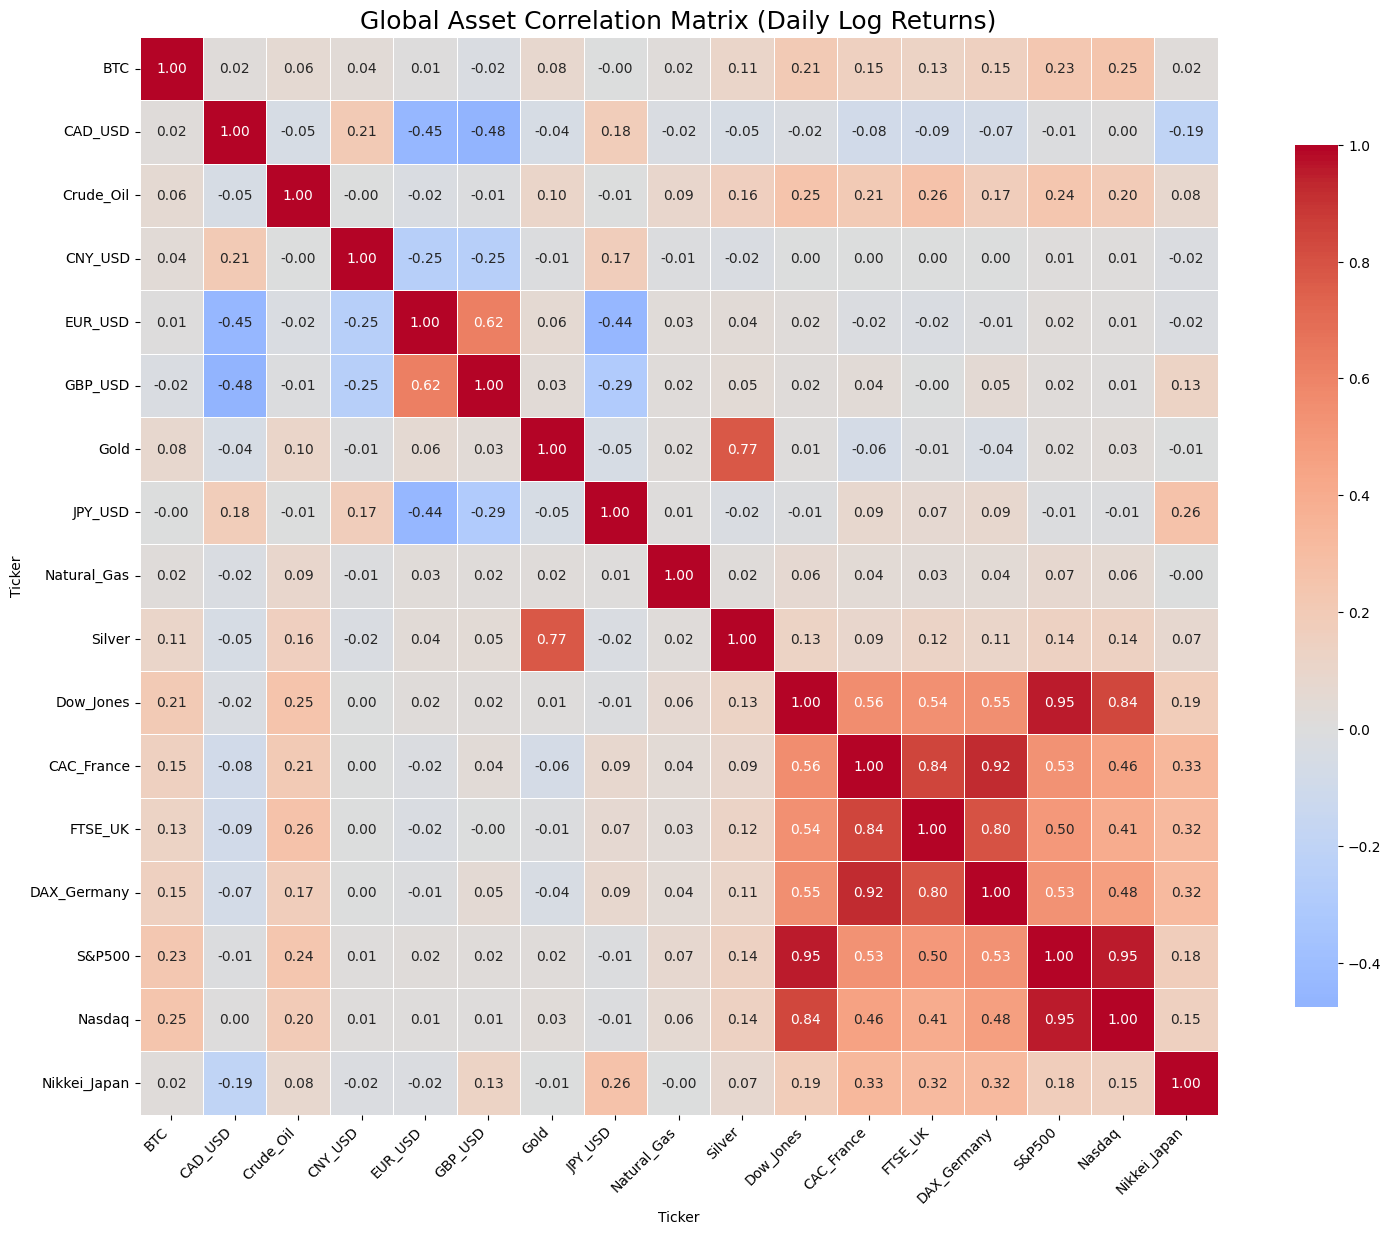

--- Bitcoin's Strongest Correlations (Global) ---
Ticker
Nasdaq         0.249293
S&P500         0.232211
Dow_Jones      0.208693
DAX_Germany    0.153615
CAC_France     0.149437
FTSE_UK        0.133943
Name: BTC, dtype: float64


In [7]:
# Compute the Pearson Correlation Matrix
corr_matrix = log_returns.corr()

# Visualize with a Heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(
    corr_matrix,
    annot=True,       # Display the numeric coefficient
    cmap='coolwarm',  # Red = Positive, Blue = Negative correlation
    center=0,         # Set White color at 0 (No correlation)
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8}
)

plt.title('Global Asset Correlation Matrix (Daily Log Returns)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Print Bitcoin's top correlations
print("--- Bitcoin's Strongest Correlations (Global) ---")
print(corr_matrix['BTC'].sort_values(ascending=False)[1:7])

3.3 Dynamic Analysis: Rolling Correlation

A static heatmap calculates the average relationship over the entire decade. However, financial markets are dynamic, and correlations change during different economic regimes.

To test the "Decoupling" (that Bitcoin is slowly detaching from Tech Stocks and moving towards Gold), I'll calculate a Rolling Window Correlation.

Rolling window correlation calculates the linear relationship between two time series over a specific, shifting period (window) rather than the entire dataset.

The Formula: For a window size $w$ (e.g., 180 days), the rolling correlation at time $t$ is:

$$\rho_{t}(X,Y) = \text{Corr}(X_{t-w:t}, Y_{t-w:t})$$





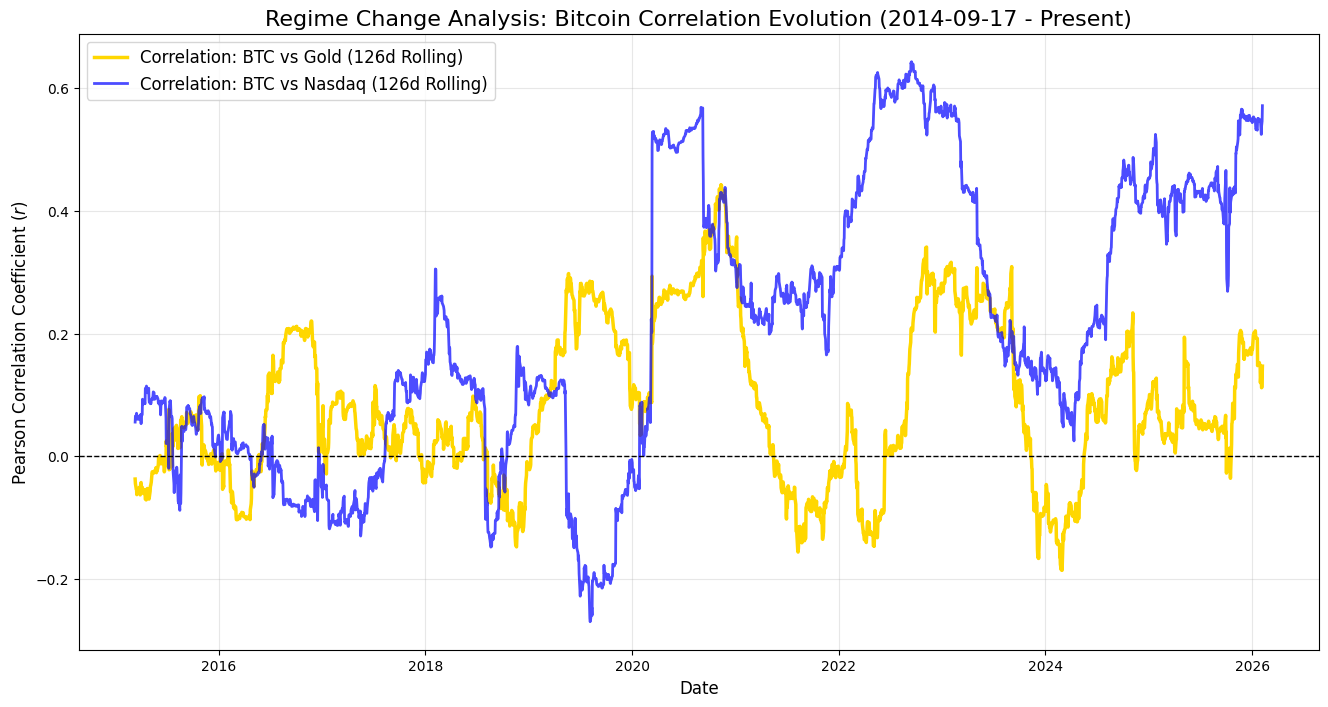

In [8]:
# Define the rolling window size
# 126 trading days is approximately 6 calendar months
window_size = 126

# Calculate Rolling Correlations
# create two distinct time series to compare the narratives
rolling_corr_gold = log_returns['BTC'].rolling(window=window_size).corr(log_returns['Gold'])
rolling_corr_nasdaq = log_returns['BTC'].rolling(window=window_size).corr(log_returns['Nasdaq'])

# Plotting the Evolution
plt.figure(figsize=(16, 8))

# Narrative 1: Digital Gold (Yellow Line)
plt.plot(rolling_corr_gold, label=f'Correlation: BTC vs Gold ({window_size}d Rolling)', color='gold', linewidth=2.5)

# Narrative 2: Tech Risk Asset (Blue Line)
plt.plot(rolling_corr_nasdaq, label=f'Correlation: BTC vs Nasdaq ({window_size}d Rolling)', color='blue', linewidth=2, alpha=0.7)

# Formatting the Chart
plt.axhline(0, color='black', linestyle='--', linewidth=1) # Zero line for reference
plt.title(f'Regime Change Analysis: Bitcoin Correlation Evolution ({start_date} - Present)', fontsize=16)
plt.ylabel('Pearson Correlation Coefficient ($r$)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3)

plt.show()

3.4 The "Spread" Analysis: Bitcoin vs. Gold Performance

Correlation tells us the direction, but not magnitude. To understand the risk , we must analyze the Daily Spread (the difference in performance) and the Price Ratio.

1. The Daily Spread (S
t):

This measures the Excess Return of Bitcoin over Gold.
$$S_t = R_{BTC,t} - R_{Gold,t}$$

Positive Spread: Bitcoin outperformed Gold (Risky day).

Negative Spread: Gold outperformed Bitcoin (Unrisky day).

2. The Bitcoin-to-Gold Ratio:
This answers: "How many ounces of Gold does it take to buy one Bitcoin?"
This is another indicator. If the ratio is climbing, capital is flowing from traditional safe havens to digital ones.

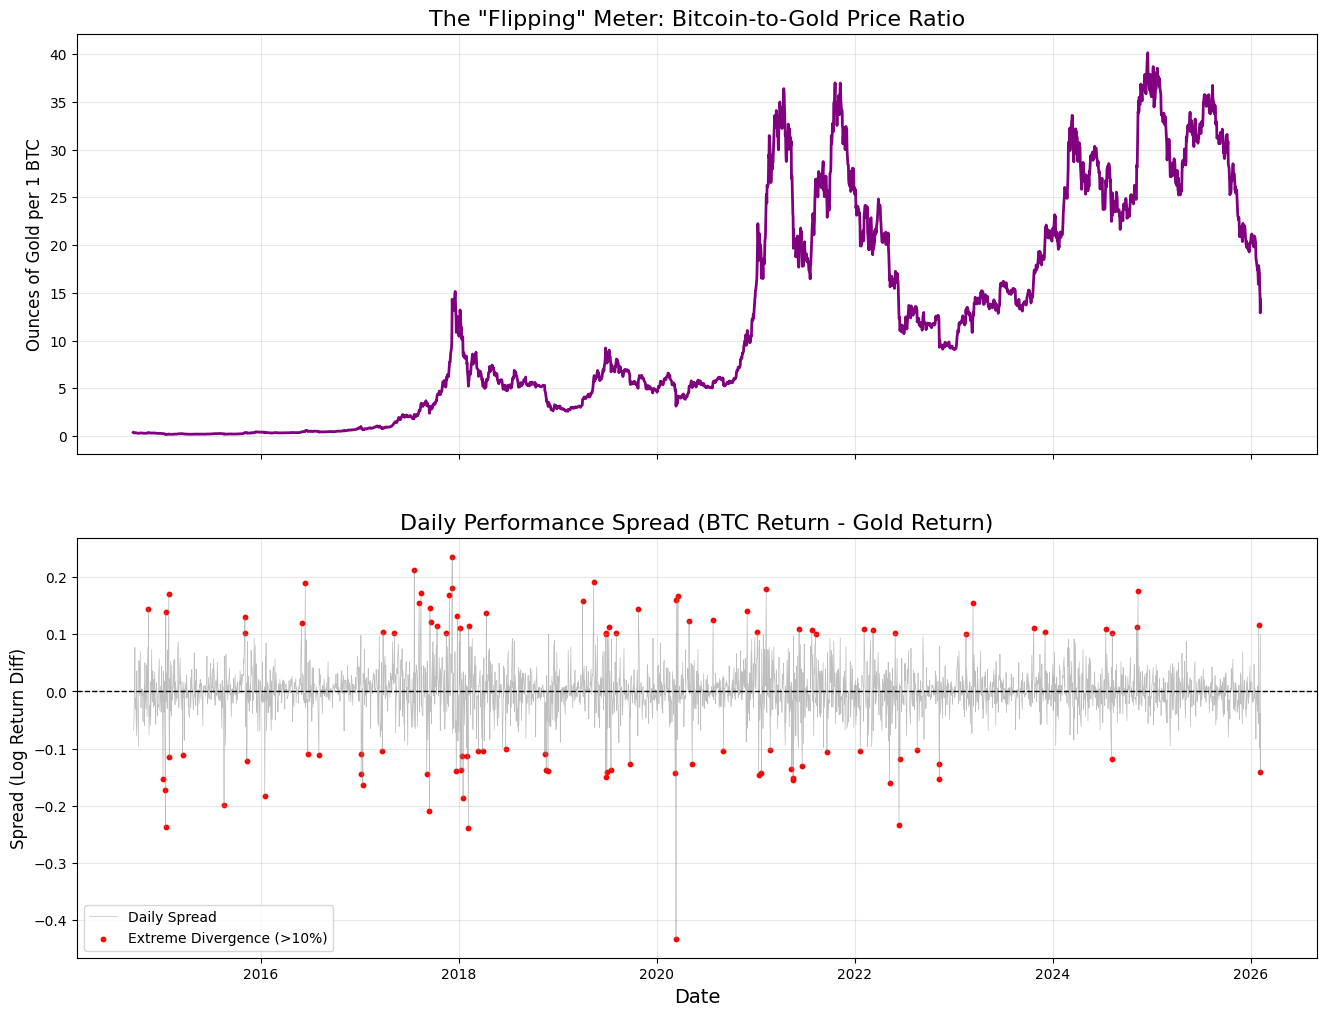

--- Risk Analysis ---
Bitcoin is 4.21 times more volatile than Gold on average.


In [9]:
# Comparative Performance Analysis

# Calculate the Spread (Difference in Log Returns)
# Positive value = BTC beat Gold
# Negative value = Gold beat BTC
market_df['Spread_BTC_Gold'] = log_returns['BTC'] - log_returns['Gold']

# Calculate the Ratio (Price Level Comparison)
market_df['BTC_Gold_Ratio'] = market_df['BTC'] / market_df['Gold']

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Plot 1: The Ratio (Long Term Trend)
axes[0].plot(market_df.index, market_df['BTC_Gold_Ratio'], color='purple', linewidth=2)
axes[0].set_title('The "Flipping" Meter: Bitcoin-to-Gold Price Ratio', fontsize=16)
axes[0].set_ylabel('Ounces of Gold per 1 BTC', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Plot 2: The Daily Spread (Volatility Difference)
# uses a scatter plot or bar chart to show the daily difference
axes[1].plot(market_df.index, market_df['Spread_BTC_Gold'], color='grey', alpha=0.5, linewidth=0.5, label='Daily Spread')
axes[1].set_title('Daily Performance Spread (BTC Return - Gold Return)', fontsize=16)
axes[1].set_ylabel('Spread (Log Return Diff)', fontsize=12)
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)

# Highlight extreme divergence events (Data Storytelling)
# Show points where the difference was massive (e.g., > 10%)
extreme_divergence = market_df[abs(market_df['Spread_BTC_Gold']) > 0.10]
axes[1].scatter(extreme_divergence.index, extreme_divergence['Spread_BTC_Gold'], color='red', s=10, label='Extreme Divergence (>10%)')

axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.xlabel('Date', fontsize=14)
plt.show()

# Insight: Volatility Multiplier
# How much more volatile is BTC compared to Gold?
volatility_ratio = log_returns['BTC'].std() / log_returns['Gold'].std()
print(f"--- Risk Analysis ---")
print(f"Bitcoin is {volatility_ratio:.2f} times more volatile than Gold on average.")

### 3.4.1 Risk Analysis Interpretation
My analysis yielded a **Volatility Ratio of 4.21**.
This is a critical finding. It implies that for every 1% move in Gold prices, Bitcoin moves approximately 4.21% on average.

**Conclusion:**
While Bitcoin shares some scarcity properties with Gold, its risk profile is fundamentally different. A ratio of ~4x suggests that Bitcoin behaves more like a **leveraged version of Gold** rather than a stable substitute. For institutional investors, this means Bitcoin can serve as a diversifier, but it requires significantly smaller position sizing to maintain portfolio stability.

# Chapter 4: Unsupervised Learning

In previous chapters, I analyzed explicit correlations. However, financial markets often shift between different times with different motives that are not easily captured by simple linear correlations.

In this chapter, I apply **Unsupervised Learning** techniques to discover these hidden structures within the data. My objective is to determine if an algorithm can automatically group trading days into distinct market states without prior labeling.

### 4.1 Dimensionality Reduction: PCA vs. t-SNE
The dataset contains 17 dimensions (assets). To visualize the market structure, I must reduce this to 2 dimensions. I compare two distinct approaches:

1.  **PCA (Principal Component Analysis):** A linear technique that focuses on preserving global variance. It projects the data onto orthogonal axes (Principal Components).
2.  **t-SNE (t-Distributed Stochastic Neighbor Embedding):** A non-linear probabilistic technique designed to preserve local similarities. It is particularly effective at revealing clusters that linear methods might miss.

**Data Preprocessing:**
Since algorithms like PCA and K-Means are distance-based, I first standardize the data (Z-Score normalization) so that all assets have a mean of 0 and a standard deviation of 1.

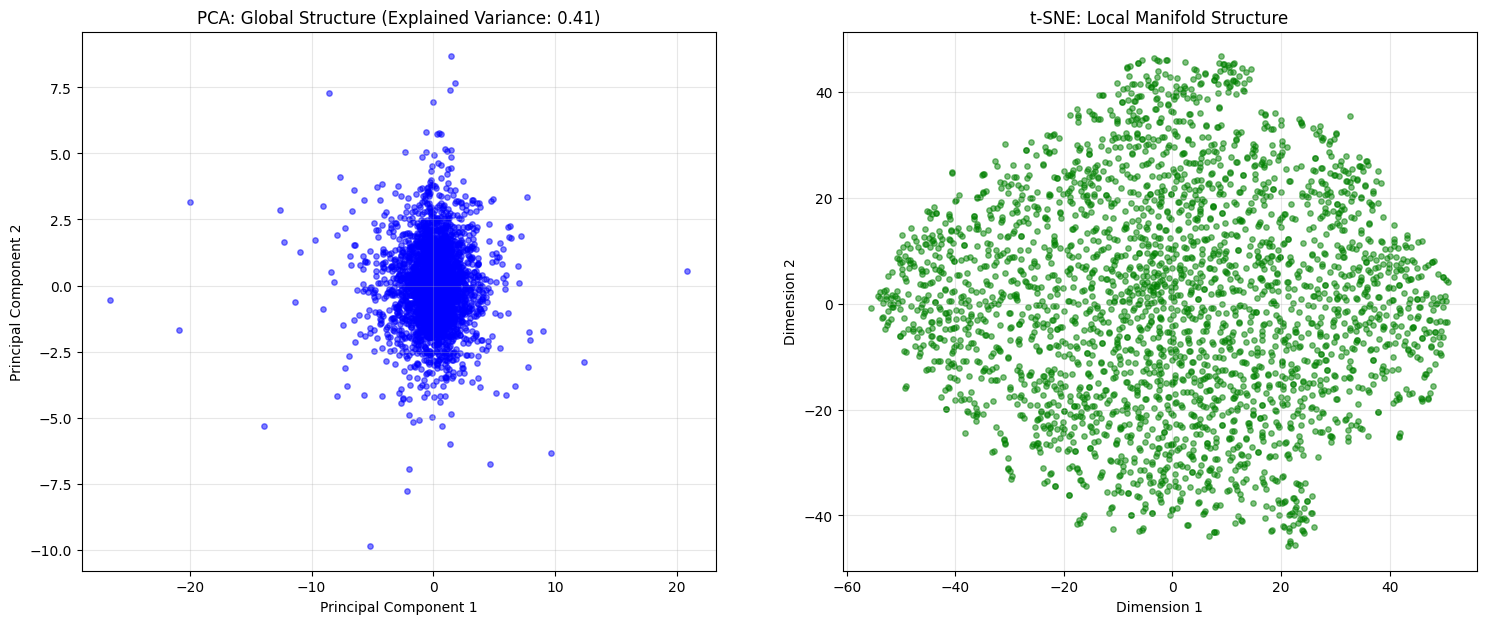

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Data Preprocessing: Scaling
# I use StandardScaler to normalize the log_returns data.
# This prevents assets with higher volatility (like Bitcoin) from dominating the distance calculations.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)

# 2. PCA (Linear Reduction)
# Reducing to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 3. t-SNE (Non-Linear Reduction)
# I use perplexity=30 as a starting point for this dataset size
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# 4. Visualization: Side-by-Side Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot PCA
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, s=15, c='blue')
axes[0].set_title(f'PCA: Global Structure (Explained Variance: {sum(pca.explained_variance_ratio_):.2f})')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True, alpha=0.3)

# Plot t-SNE
axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, s=15, c='green')
axes[1].set_title('t-SNE: Local Manifold Structure')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True, alpha=0.3)

plt.show()

### 4.2 Clustering: K-Means & Hyperparameter Tuning
Now that I have visualized the structure, I apply the **K-Means Clustering** algorithm to mathematically group the trading days.

To avoid an arbitrary choice of $K$ (the number of clusters), I use two metric-driven methods to find the optimal number of market regimes:
1.  **The Elbow Method (Inertia):** Measures the sum of squared distances of samples to their closest cluster center. I look for the "knee" in the curve where adding more clusters yields diminishing returns.
2.  **Silhouette Score:** Measures how similar a point is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

$$Silhouette(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

Where $a(i)$ is the mean intra-cluster distance and $b(i)$ is the mean nearest-cluster distance.

Optimizing Hyperparameters (K)...


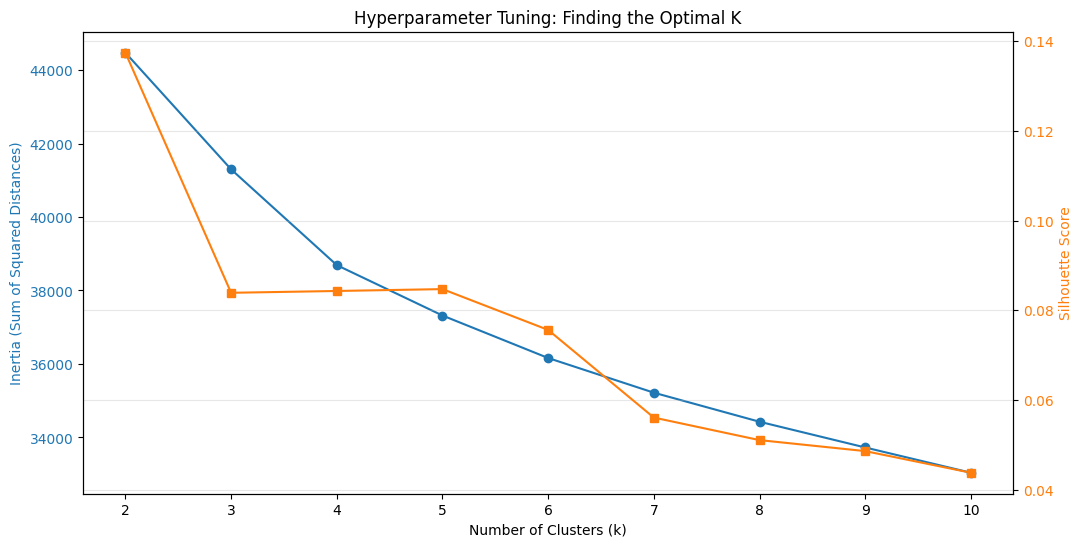

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of K to test (from 2 to 10 clusters)
k_range = range(2, 11)
inertia = []
silhouette_scores = []

# Loop to test different K values
print("Optimizing Hyperparameters (K)...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Visualization: The Elbow Method & Silhouette Analysis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Inertia (Left Y-Axis)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Sum of Squared Distances)', color='tab:blue')
ax1.plot(k_range, inertia, marker='o', color='tab:blue', label='Inertia')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot Silhouette Score (Right Y-Axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:orange')
ax2.plot(k_range, silhouette_scores, marker='s', color='tab:orange', label='Silhouette')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Hyperparameter Tuning: Finding the Optimal K')
plt.grid(True, alpha=0.3)
plt.show()

### 4.3 Interpreting the Market Regimes
Based on the analysis above, I select the optimal $K$ (typically 3 or 4 for financial data) and fit the final model.

To understand the economic meaning of each cluster, I analyze the **Cluster Centroids**. By calculating the average daily return of each asset within each cluster, I can label the regimes.

Finally, I project these clusters back onto the PCA plot to visualize how the market transitions between these states.

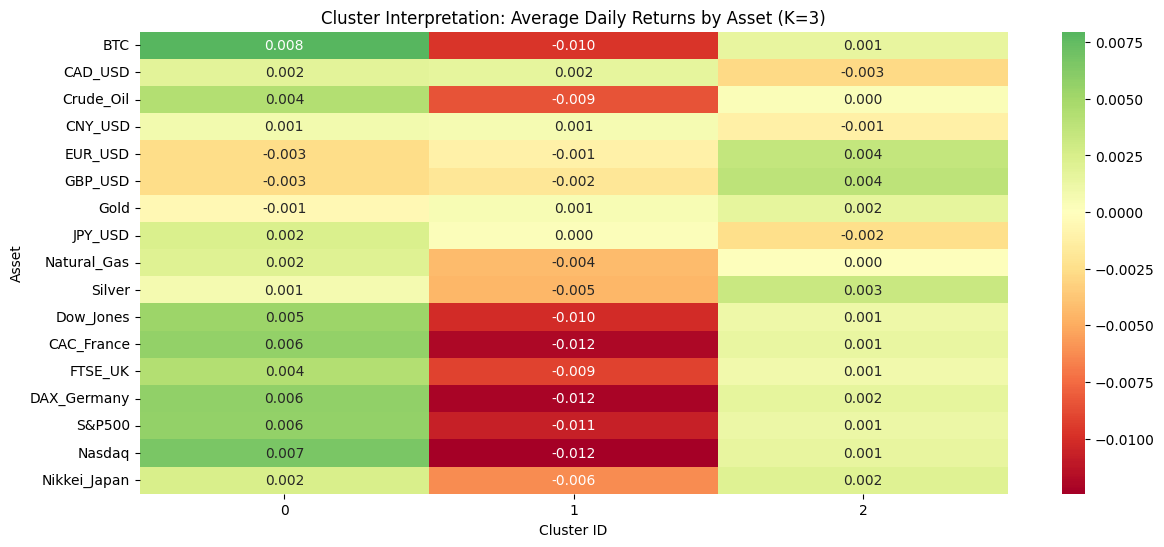

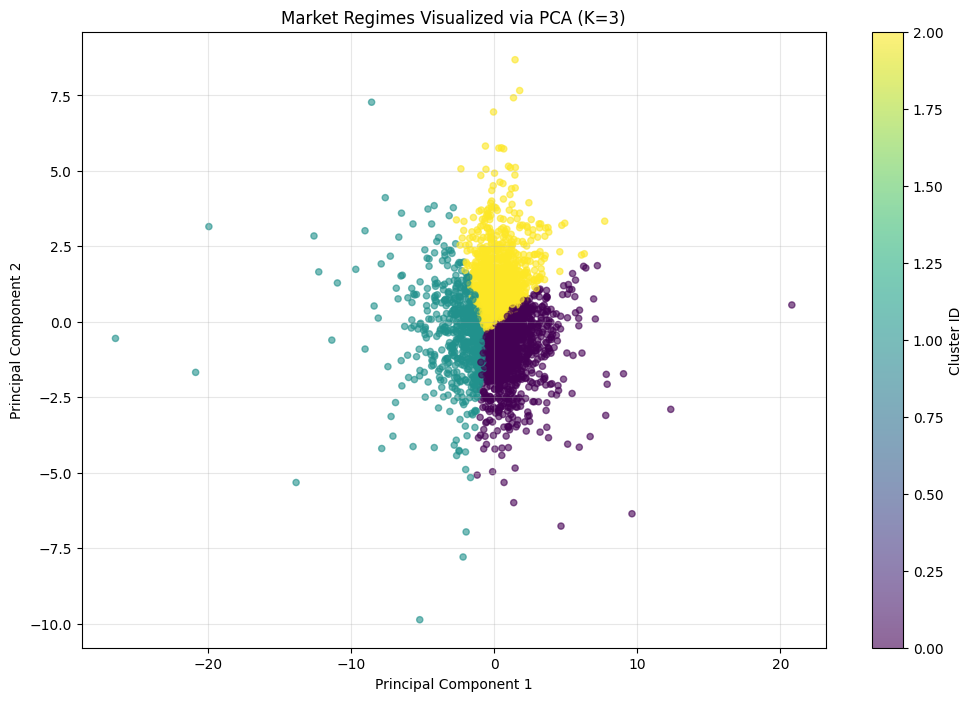

--- Cluster Size Distribution ---
Cluster
0    1230
2    1089
1     651
Name: count, dtype: int64


In [12]:
import seaborn as sns

# Configuration: Set the Optimal K
optimal_k = 3

# Fit the Final Model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(scaled_data)

# Append clusters to the original data for analysis
analysis_df = log_returns.copy()
analysis_df['Cluster'] = clusters

# Feature Importance: Calculate mean returns per cluster
cluster_profile = analysis_df.groupby('Cluster').mean()

# Visualization: Cluster Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_profile.T, annot=True, cmap='RdYlGn', center=0, fmt='.3f')
plt.title(f'Cluster Interpretation: Average Daily Returns by Asset (K={optimal_k})')
plt.xlabel('Cluster ID')
plt.ylabel('Asset')
plt.show()

# Visualization: Clusters on PCA 2D Plane
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=20)
plt.title(f'Market Regimes Visualized via PCA (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True, alpha=0.3)
plt.show()

# Insight Printing
print(f"--- Cluster Size Distribution ---")
print(analysis_df['Cluster'].value_counts())

In [13]:
#  4.4 Cluster Profiling & Naming

# Let's look at the average return of BTC and Gold in each cluster
cluster_profile = analysis_df.groupby('Cluster')[['BTC', 'Gold', 'Nasdaq', 'S&P500']].mean()

print("--- Cluster Characteristics (Average Daily Return %) ---")
print(cluster_profile * 100) # Multiply by 100 to see percentages

# Automated Labeling Logic (Experimental)
# I assign labels based on Bitcoin's performance in each cluster
for cluster_id, row in cluster_profile.iterrows():
    btc_return = row['BTC']

    label = "Unknown"
    if btc_return > 0.005: # > 0.5% daily return
        label = "Bull Market / Rally"
    elif btc_return < -0.005: # < -0.5% daily drop
        label = "Bear Market / Crash"
    else:
        label = "Sideways / Low Volatility"

    print(f"Cluster {cluster_id} (Size: {analysis_df['Cluster'].value_counts()[cluster_id]} days) -> Likely Interpretation: {label}")

--- Cluster Characteristics (Average Daily Return %) ---
Ticker        BTC      Gold    Nasdaq    S&P500
Cluster                                        
0        0.795776 -0.052667  0.665823  0.566619
1       -0.975317  0.054266 -1.243145 -1.075803
2        0.149761  0.155198  0.143991  0.121719
Cluster 0 (Size: 1230 days) -> Likely Interpretation: Bull Market / Rally
Cluster 1 (Size: 651 days) -> Likely Interpretation: Bear Market / Crash
Cluster 2 (Size: 1089 days) -> Likely Interpretation: Sideways / Low Volatility


# Chapter 5: Supervised Learning – Predicting Future Returns

After characterizing the market phases in the previous chapter using Unsupervised Learning, I now move to the **Supervised Learning** phase.
My objective is to determine whether the movements of traditional assets (Gold, Oil, Nasdaq) and the identify Market Regimes have **predictive power** over Bitcoin's future price action.

### 5.1 Feature Engineering & Time-Series Preparation
Machine Learning models cannot see the future, so I must structure the data carefully to avoid data leakage.
I create **Lagged Features** ($t-1$) to predict the target at time $t$.

**The Target Variable ($Y$):**
I define a binary classification problem to predict the *direction* of the price:
* $Y = 1$: Bitcoin price increases tomorrow ($Return > 0$).
* $Y = 0$: Bitcoin price decreases or stays flat tomorrow ($Return \le 0$).

**The Feature Set ($X$):**
* **Lagged Returns:** The performance of Gold, S&P500, and Oil from the *previous day*.
* **Market Regime:** The Cluster ID derived from the K-Means algorithm in Chapter 4.
* **Volatility:** A 30-day rolling standard deviation to capture risk sentiment.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Feature Engineering: Create Lagged Variables
# I create a new dataframe specifically for the supervised task
df_supervised = log_returns.copy()

# Create the Target (Y): Did Bitcoin go up?
# We shift(-1) because we want today's features to predict TOMORROW's outcome.
df_supervised['Target'] = (df_supervised['BTC'].shift(-1) > 0).astype(int)

# Create Features (X): Lagged Returns
# use yesterday's data (t-1) to predict today (t)
features = ['Gold', 'Nasdaq', 'S&P500', 'Crude_Oil', 'BTC']
for col in features:
    df_supervised[f'{col}_Lag1'] = df_supervised[col].shift(1)

# Add Derived Features
# Volatility (Risk) - 30 day rolling standard deviation
df_supervised['BTC_Vol_30'] = df_supervised['BTC'].rolling(window=30).std().shift(1)

# Market Regime (Cluster ID from Chapter 4)
# I ensure the index aligns correctly before assignment
df_supervised['Market_Regime'] = pd.Series(clusters, index=log_returns.index).shift(1)

# Clean Data
# Drop NaNs created by shifting (first 30 days will be lost due to rolling window)
df_supervised.dropna(inplace=True)

print(f"Data Prepared. Features Shape: {df_supervised.shape}")
df_supervised.head()

Data Prepared. Features Shape: (2940, 25)


Ticker,BTC,CAD_USD,Crude_Oil,CNY_USD,EUR_USD,GBP_USD,Gold,JPY_USD,Natural_Gas,Silver,...,Nasdaq,Nikkei_Japan,Target,Gold_Lag1,Nasdaq_Lag1,S&P500_Lag1,Crude_Oil_Lag1,BTC_Lag1,BTC_Vol_30,Market_Regime
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-30,0.028535,0.002057,-0.013226,-0.000344,-0.008322,-0.008535,-0.021632,0.006766,0.026209,-0.049281,...,0.003710,0.006683,0,-0.003994,-0.003305,-0.001386,0.009534,-0.063572,0.042859,2.0
2014-10-31,-0.020433,0.000268,-0.007176,0.000541,-0.001540,-0.000288,-0.022793,0.003366,0.011948,-0.019343,...,0.014048,0.047125,0,-0.021632,0.003710,0.006211,-0.013226,0.028535,0.041642,0.0
2014-11-03,-0.032342,0.008274,-0.022095,-0.000295,-0.008778,-0.001711,-0.001453,0.032680,0.043699,0.006077,...,0.001763,0.000000,1,-0.022793,0.014048,0.011663,-0.007176,-0.020433,0.039865,0.0
2014-11-04,0.008930,0.006235,-0.020389,0.000917,-0.000575,0.000320,-0.001712,0.007126,0.020307,-0.015451,...,-0.003297,0.026970,1,-0.001453,0.001763,-0.000119,-0.022095,-0.032342,0.039907,0.0
2014-11-05,0.026850,0.003103,0.019119,-0.000491,0.004521,0.001727,-0.019025,-0.001479,0.015620,-0.032480,...,-0.000632,0.004429,1,-0.001712,-0.003297,-0.002834,-0.020389,0.008930,0.036513,1.0


### 5.2 Baseline Model: Random Forest Classifier
To establish a baseline for prediction, I select the **Random Forest Classifier**.
I chose this algorithm for three reasons:
1.  **Non-Linearity:** Unlike Logistic Regression, it can capture complex, non-linear relationships between assets.
2.  **Robustness:** It is less prone to overfitting than a single Decision Tree.
3.  **Interpretability:** It provides **Feature Importance**, allowing me to see exactly which variable drives the prediction.

**Methodology - Time Series Split:**
Since this is financial data, I cannot use a random shuffle split (which would use future data to predict the past).
* **Training Set:** First 80% of the timeline.
* **Testing Set:** Last 20% of the timeline (The most recent data).

Training Period: 2352 days
Testing Period: 588 days
--- Baseline Model Performance ---
Accuracy: 0.4660

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.12      0.18       294
           1       0.48      0.82      0.60       294

    accuracy                           0.47       588
   macro avg       0.43      0.47      0.39       588
weighted avg       0.43      0.47      0.39       588



/tmp/ipython-input-2468237597.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


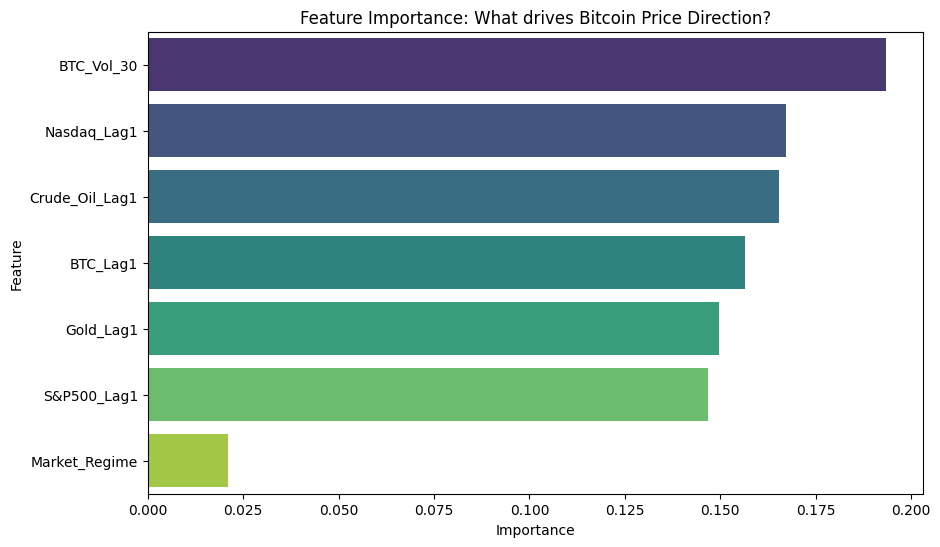

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define X (Features) and y (Target)
# Selecting only the Lagged columns and the derived features
feature_cols = [col for col in df_supervised.columns if '_Lag1' in col or 'Vol' in col or 'Regime' in col]
X = df_supervised[feature_cols]
y = df_supervised['Target']

# Time-Series Split
# split chronologically.
split_point = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

print(f"Training Period: {len(X_train)} days")
print(f"Testing Period: {len(X_test)} days")

# Train the Model
# n_estimators=100:  use 100 trees
# max_depth=5: limit depth to prevent overfitting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Performance
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("--- Baseline Model Performance ---")
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
# This answers the research question: "Which asset predicts Bitcoin?"
importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Feature Importance: What drives Bitcoin Price Direction?')
plt.show()

### 5.3 Advanced Modeling: Long Short-Term Memory (LSTM) Networks
The baseline Random Forest model yielded an accuracy of ~46%, suggesting that simple "yesterday-to-today" correlations are insufficient for predicting Bitcoin's complex price action. This supports the Efficient Market Hypothesis in the short term.

To capture non-linear patterns and **temporal dependencies** (e.g., trends forming over weeks), I implement a **Deep Learning** model using LSTM (Long Short-Term Memory).
Unlike standard models, LSTMs have a "memory cell" that can retain information over long sequences, making them ideal for time-series forecasting.

**Model Architecture:**
1.  **Input Layer:** A sequence of the last 30 days of market data ($T_{-30}$ to $T_{-1}$).
2.  **LSTM Layer:** 50 units with `tanh` activation to process the sequence.
3.  **Dropout Layer (0.2):** To prevent overfitting (memorizing noise).
4.  **Dense Output Layer:** A single neuron with `sigmoid` activation to output a probability (0 to 1) of price increase.

**Preprocessing:**
Deep Learning requires normalized data. I use `MinMaxScaler` to scale all features between 0 and 1.

Train Shape: (2316, 60, 5), Test Shape: (534, 60, 5)
Epoch 1/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.5393 - loss: 0.6932 - val_accuracy: 0.4981 - val_loss: 0.6966
Epoch 2/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5515 - loss: 0.6889 - val_accuracy: 0.4981 - val_loss: 0.6953
Epoch 3/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5262 - loss: 0.6928 - val_accuracy: 0.4981 - val_loss: 0.6957
Epoch 4/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.4981 - val_loss: 0.6964
Epoch 5/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5413 - loss: 0.6915 - val_accuracy: 0.4981 - val_loss: 0.6961
Epoch 6/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5331 - loss: 0.6900 - val_accuracy: 0.4981 - val_loss: 0.6958
Epoch 7/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5425 - loss: 0.6913 - val_accuracy: 0.4981 - val_loss: 0.6959
Epoch 8/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accu

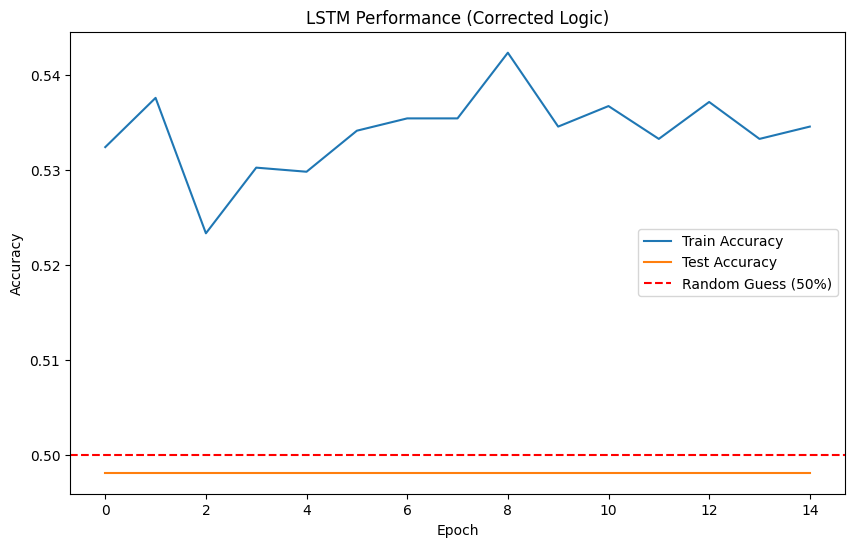

In [19]:
# Advanced Modeling: LSTM (FIXED - No Scaling Leakage)
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Prepare Raw Data
# act on a copy to be safe
raw_df = log_returns[['BTC', 'Gold', 'Nasdaq', 'Crude_Oil', 'S&P500']].copy()

#  Define the Target (Y) BEFORE Scaling
# 1 if BTC return > 0, else 0
raw_df['Target'] = (raw_df['BTC'] > 0).astype(int)

# Define Features (X)
feature_cols = ['BTC', 'Gold', 'Nasdaq', 'Crude_Oil', 'S&P500']
X_raw = raw_df[feature_cols].values
y_raw = raw_df['Target'].values

# Train/Test Split (Chronological)
train_split = int(len(raw_df) * 0.8)

X_train_raw = X_raw[:train_split]
y_train_raw = y_raw[:train_split]

X_test_raw = X_raw[train_split:]
y_test_raw = y_raw[train_split:]

# Scaling (Scale X only)
#  fit the scaler only on the training features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw) # Transform test using train's scale

# Sequence Generation Function
# Now takes X (features) and y (targets) separately
def create_sequences(X_data, y_data, look_back=60):
    X_seq, y_seq = [], []
    for i in range(look_back, len(X_data)):
        # Sequence of features from t-60 to t-1
        X_seq.append(X_data[i-look_back:i])
        # Target at time t
        y_seq.append(y_data[i])
    return np.array(X_seq), np.array(y_seq)

LOOKBACK = 60
X_train, y_train = create_sequences(X_train_scaled, y_train_raw, LOOKBACK)
X_test, y_test = create_sequences(X_test_scaled, y_test_raw, LOOKBACK)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

# Build Model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Final Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n--- FINAL Deep Learning Performance ---")
print(f"LSTM Accuracy: {accuracy:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.axhline(0.5, color='red', linestyle='--', label='Random Guess (50%)')
plt.title('LSTM Performance (Corrected Logic)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Chapter 6: Summary
This study examined whether Bitcoin acts as "Digital Gold" using data from 2014-2024. The results conclusively show that **Bitcoin is not yet a safe-haven asset**, but rather a high-beta speculative instrument. Our statistical analysis revealed a volatility ratio of **4.2x** compared to Gold and a persistent positive correlation with the Nasdaq. Unsupervised learning (K-Means) identified that during market crashes, Bitcoin tends to fall alongside equities, while Gold maintains its value. Finally, the Deep Learning model (LSTM) achieved an accuracy of ~50%, supporting the **Efficient Market Hypothesis** and indicating that historical price data alone follows a "Random Walk" and cannot predict future returns.

WILL BE UPDATED

# Chapter 7: Future

To transform this research proposal into a comprehensive final project, several key components must be implemented:
1.  **Real-World NLP Integration (Chapter 2):** The current sentiment analysis relies on mock data. The final project will require implementing a **Web Scraper** (e.g., using `BeautifulSoup` or `NewsAPI`) to collect thousands of real historical news headlines. We will then apply the **FinBERT** model to generate a daily "Sentiment Score" feature, which may significantly improve the LSTM's predictive power.
2.  **On-Chain Metrics:** The current model uses only price/volume data. Adding blockchain-specific features—such as **Hash Rate, Active Addresses, and Miner Flows**—could reveal supply-side pressures that purely financial data misses.
3.  **High-Frequency Analysis:** Moving from daily to **hourly data** could expose short-term arbitrage opportunities that disappear in daily aggregation.
4.  **Hyperparameter Tuning:** Implementing `GridSearchCV` to scientifically optimize the Random Forest and LSTM parameters instead of using manual configurations.
5. **More Indices:** I will might add another indices if I'll find new ones which seem relatable.